<a href="https://colab.research.google.com/github/ishitagupta03/datascience/blob/main/Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/dataa.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.shape

(7043, 20)

In [ ]:
gender_count=pd.DataFrame(df['gender'].value_counts())
gender_count

,gender
0,3549
1,3483


There is an almost equal gender distribution.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Total charges and monthly charges are of diff. datatypes.


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% of the customers have tenure of less then 55 months

In [ ]:
df.groupby('Contract').sum()

,SeniorCitizen,tenure,MonthlyCharges
Contract,,,
Month-to-month,807,69892,257294.15
One year,190,61932,95816.60
Two year,145,96166,103005.85


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


coerce is used for ignoring spaces in string
returning rows whose total charges are null.

Dropping those columns which have empty value of Total Charges

In [ ]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [ ]:
df[df.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


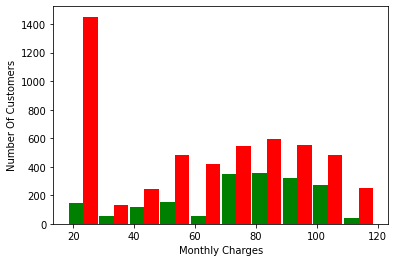

In [ ]:
no=df[df.Churn=='No'].MonthlyCharges
yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.hist([yes, no], rwidth=0.95, color=['green','red'])
plt.show()

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

One hot encoding: Finding unique values per feature and transform data

In [ ]:
df= pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
churn_count=pd.DataFrame(df['Churn'].value_counts())
churn_count

,Churn
0,5163
1,1869


Overall Churn rate is low


In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.016328,0.013093,0.000807,0.008507,0.007124,0.010105,0.011902,0.013779,0.008545,-0.007584,0.011189,-0.004745,0.003251,-0.007755,0.003603,0.015973,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219874,0.150541,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097825,-0.149982,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112343,-0.163128,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,-0.354049,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.248033,0.011691,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.163746,0.490912,0.040033,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296447,-0.171270,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,-0.082307,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,-0.066193,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


Heatmap showing correlation

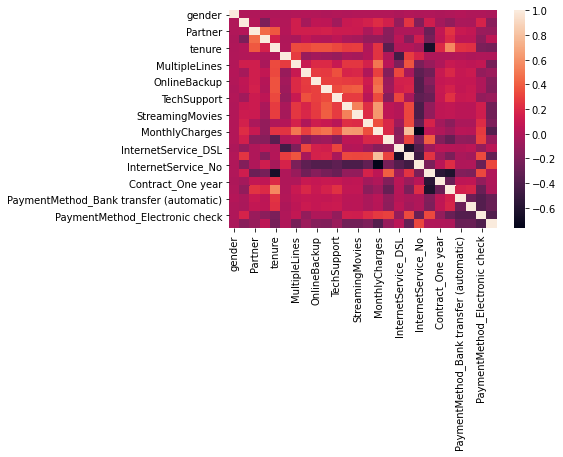

In [ ]:
sns.heatmap(df.corr())

Displaying positively and negatively correlated features.

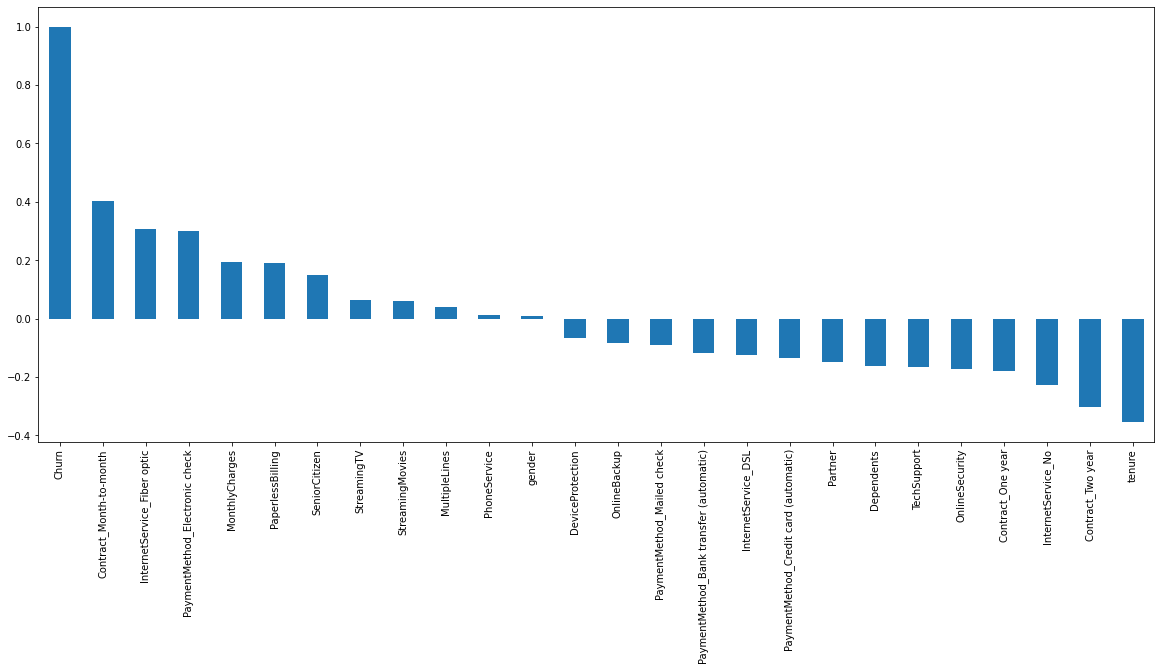

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

1.  Fiber optic is the preferred choice for internet service.
2.  Most of the customers are on a monthly contract.



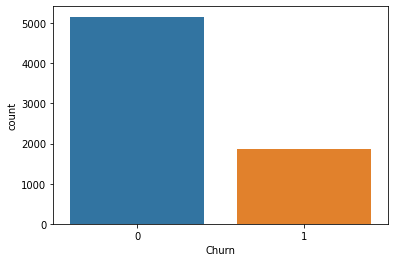

In [ ]:

sns.countplot(x='Churn', data=df)

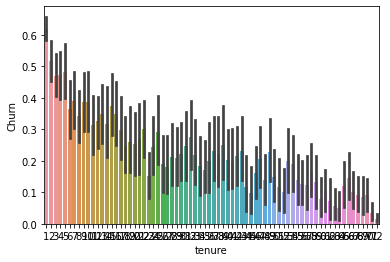

In [ ]:
sns.barplot(x='tenure', y='Churn',data=df)

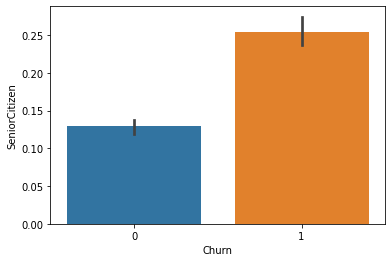

In [ ]:
sns.barplot(x='Churn',y='SeniorCitizen',data=df)

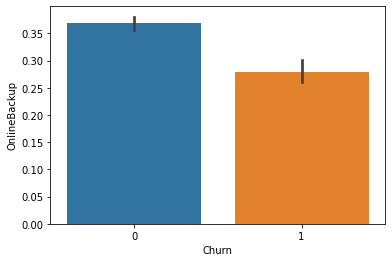

In [ ]:
sns.barplot(x='Churn',y='OnlineBackup',data=df)

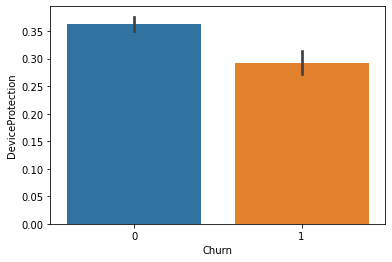

In [ ]:
sns.barplot(x='Churn',y='DeviceProtection',data=df)

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

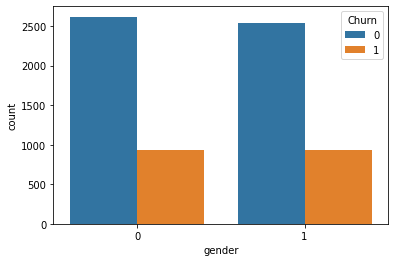

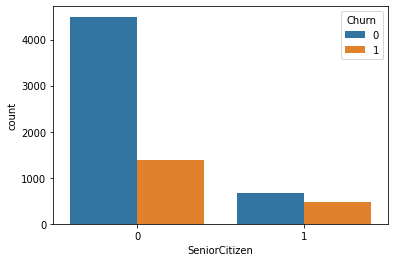

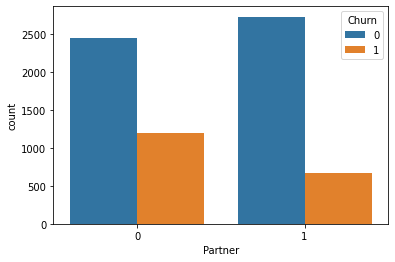

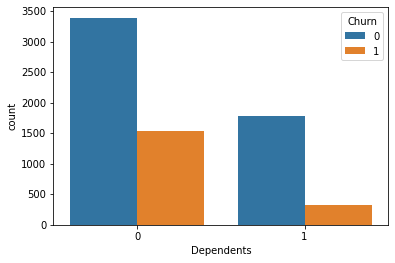

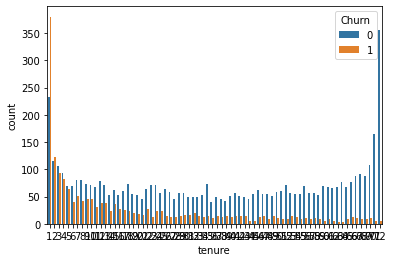

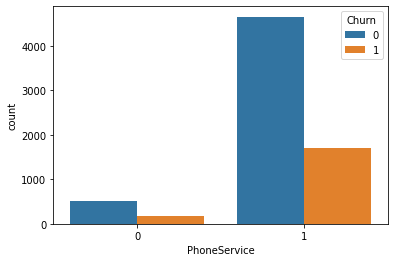

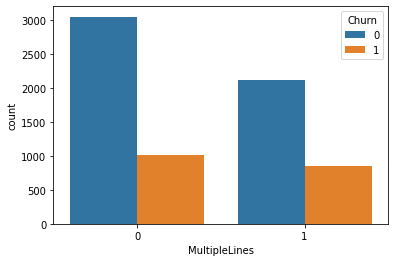

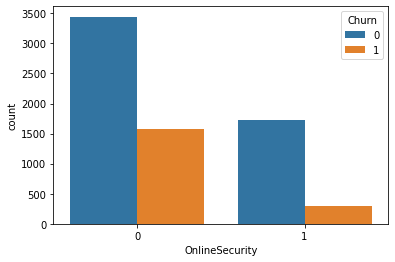

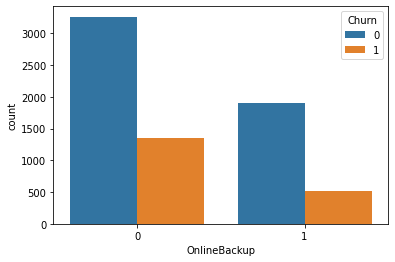

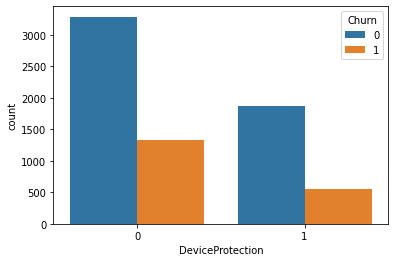

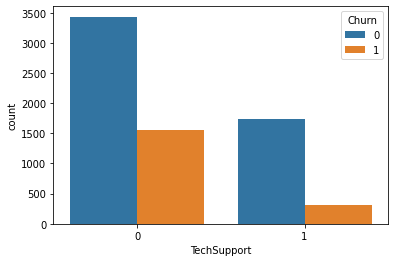

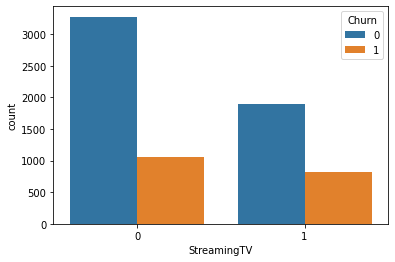

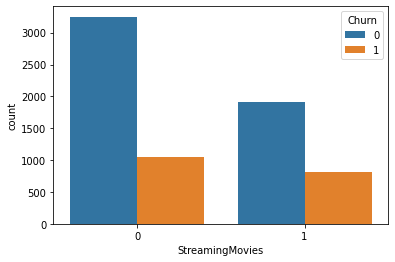

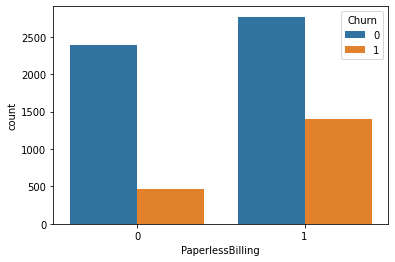

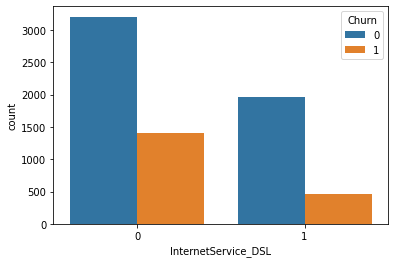

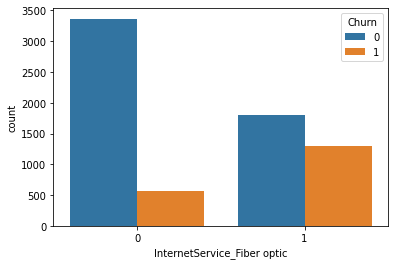

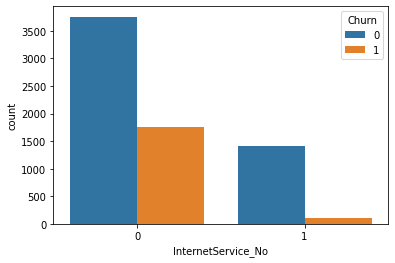

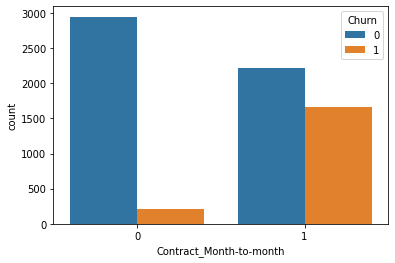

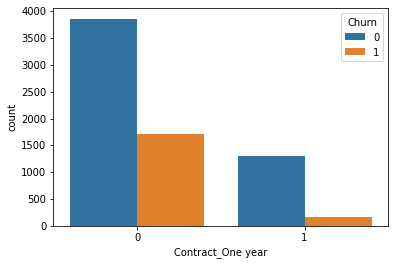

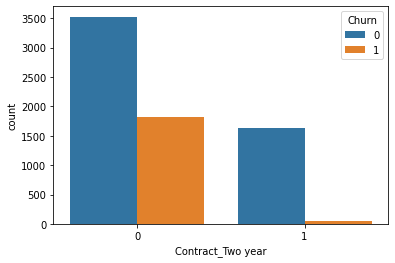

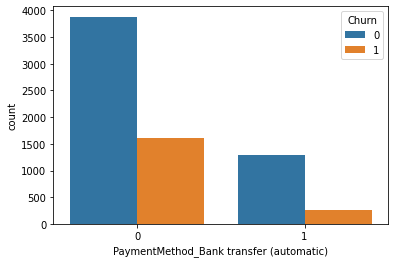

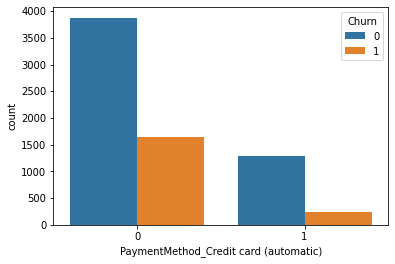

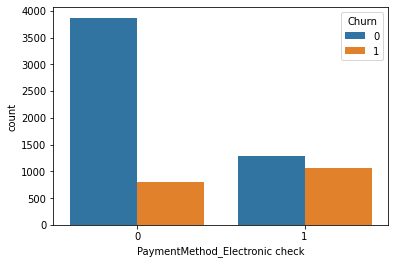

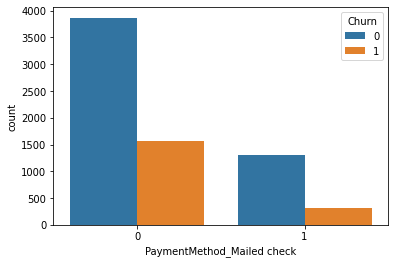

In [ ]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [ ]:
df = pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,TotalCharges_1001.5,TotalCharges_1003.05,TotalCharges_1004.35,TotalCharges_1004.5,TotalCharges_1004.75,TotalCharges_1005.7,TotalCharges_1006.9,...,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

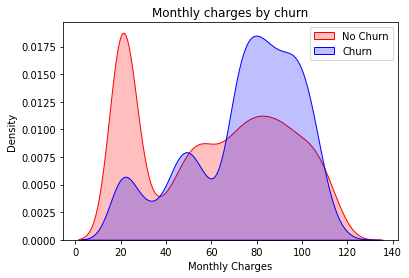

In [ ]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

High Churn at high monthly Charges

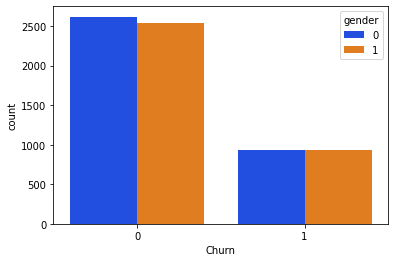

In [ ]:
sns.countplot(data = df, x= col, order=df['Partner'].value_counts().index,hue='gender',palette='bright')
plt.show()

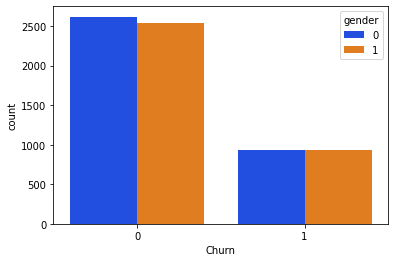

In [ ]:
sns.countplot(data = df, x= col, order=df['TechSupport'].value_counts().index,hue='gender',palette='bright')
plt.show()

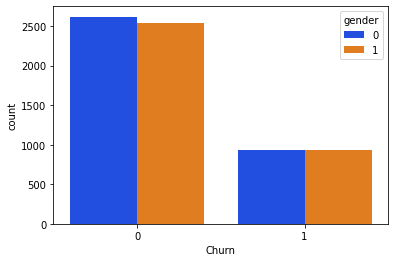

In [ ]:
sns.countplot(data = df, x= col, order=df['SeniorCitizen'].value_counts().index,hue='gender',palette='bright')
plt.show()

Non senior citizens are high churners


In [ ]:
Y = df['Churn']
X = df.drop('Churn',axis='columns')

In [ ]:
le = LabelEncoder() 
Y = le.fit_transform(Y)

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.2)

20% records are test data and 80% are training

In [ ]:
Knn = KNeighborsClassifier(n_neighbors = 4).fit(Train_X,Train_Y)

In [ ]:
prediction = Knn.predict(Test_X)

Accuracy of KNN

In [ ]:
accuracy_score(Test_Y, prediction)

0.7633262260127932

In [ ]:
reg = linear_model.LogisticRegression()
reg.fit(Train_X,Train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = reg.predict(Test_X)

Accuracy of Logistic Regression

In [ ]:
accuracy_score(Test_Y, predict)

0.7874911158493249

In [ ]:
confu_mat = confusion_matrix(Test_Y, predict)
print(confu_mat)

[[908 111]
 [188 200]]


In [ ]:
lm1 = DecisionTreeClassifier().fit(Train_X,Train_Y)
forest_pred = lm1.predict(Test_X)

Accuracy of Decision Tree Classifier

In [ ]:
accuracy_score(Test_Y, forest_pred)

0.7619047619047619

In [ ]:
confu_mat = confusion_matrix(Test_Y, forest_pred)
print(forest_pred)

[0 0 0 ... 1 0 0]


In [ ]:
lm2 = RandomForestClassifier(n_estimators= 100,random_state= 20).fit(Train_X,Train_Y)
forest_pred = lm2.predict(Test_X)

Accuracy of Random Forest Classifier


In [ ]:
accuracy_score(Test_Y, forest_pred)

0.7874911158493249

In [ ]:
confu_mat = confusion_matrix(Test_Y, forest_pred)
print(confu_mat)

[[930  89]
 [210 178]]


Conclusion : Random Forest Classifier has maximum accuracy


In [ ]:
con=[]
cat=[]
for i in df.columns:
 if df[i].dtypes=='int64':
  con.append(i)
 elif df[i].dtypes=='object':
  cat.append(i)

Continuous Variables


In [ ]:
con

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

Categorical Variables

In [ ]:
cat

[]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

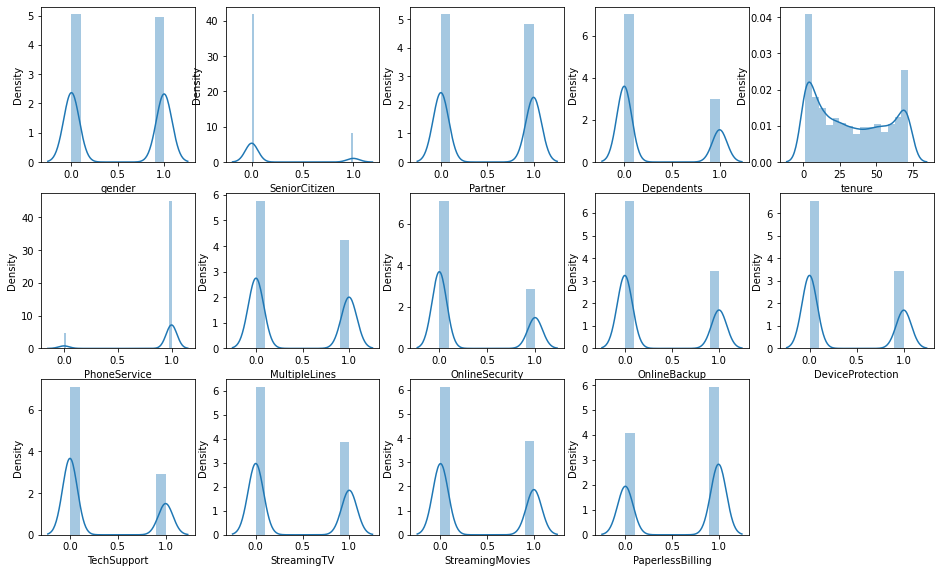

In [ ]:
plt.figure(figsize = (16,20))
for i in range(0,14):
 plt.subplot(6,5,i+1)
 sns.distplot(df[con[i]])